# Softmax Regression

In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split

In [2]:
# Generate random points surround 3 centroids: [2,2], [8,3], [3,6]
means = [[2, 2], [5, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

N = 7500
C = 3

X_0 = np.random.multivariate_normal(means[0], cov, N)
X_1 = np.random.multivariate_normal(means[1], cov, N)
X_2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X_0, X_1, X_2), axis = 0).T

# extended data: append a colum of number 1 to the left
X = np.concatenate((np.ones((1, C*N)), X), axis = 0).T
y = np.array([[0]*N, [1]*N, [2]*N]).reshape(C*N,)

# split train set and test set from data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_test.shape, y_test.shape)

(4500, 3) (4500,)


In [3]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

# For a multi_class problem, if multi_class is set to 
# be “multinomial” the softmax function is used to 
# find the predicted probability of each class
logreg = linear_model.LogisticRegression(C=1e5, solver = 'lbfgs', multi_class = 'multinomial')

# train
logreg.fit(X_train, y_train)
print(logreg.coef_)

# test
y_pred = logreg.predict(X_test)

# evaluate
print("Accuracy: %.2f %%" %(100 * accuracy_score(y_test, y_pred.tolist())))

color = ['red', 'blue', 'green']

[[ 5.23733186 -1.36050125 -1.63249713]
 [-1.30446145  1.70201372 -0.67227725]
 [-3.9328704  -0.34151247  2.30477438]]
Accuracy: 93.07 %


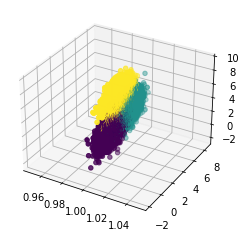

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train)

- Graph1: Visualize X_test colored by corresponding label in y_test
- Graph2: Visualize X_test colored by corresponding label in y_pred

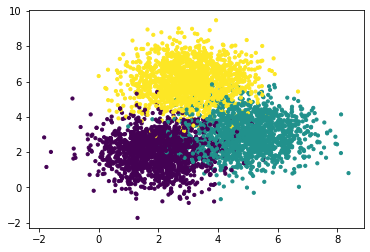

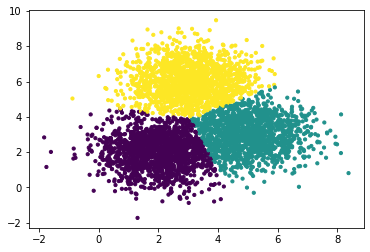

In [5]:
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, s=10)
plt.figure()
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_pred, s=10)